# Scotogenic Model

We will compute $\mathrm{BR}(\mu\to e\gamma)$ in the scotogenic model ([arXiv:hep-ph/0601225](http://arxiv.org/abs/hep-ph/0601225), [arXiv:2004.05172 [hep-ph]](http://arxiv.org/abs/2004.05172))

## Determining the SM Lagrangian parametrs in the SM

As a first approximation, we will neglect the effect of the SMEFT coefficients in the determination of $g$, $g'$, $g_s$, $\lambda$, $y_u$, $y_d$, $y_\ell$. These parameters are obtained by `sminputs` using `wilson`.

In [1]:
import numpy as np
import sminputs
import scotogenic
from wilson import Wilson
import flavio

import matplotlib.pyplot as plt
plt.rcParams.update({'pgf.texsystem':'pdflatex'})

... but there is a small problem. We have calculated the parameters at $\Lambda_\mathrm{NP}=1\,\mathrm{TeV}$, but we need them at $\Lambda_\mathrm{NP}=10\,\mathrm{TeV}$!

To set the $\Lambda_\mathrm{NP}$ for the calculation of the SM parameters, you can either:
* Change manually the variable `HIGHSCALE` in the file `sminputs.py`, or
* Run the following code:

In [2]:
sminputs.HIGHSCALE = 10000 #New physics scale.
sminputs.calculate()
scotogenic.reloadsminputs()

We define the parameters of the scotogenic model,

In [3]:
mueta = 10500
MN1 = 10000
MN2 = 10100
MN3 = 10200

lam2 = 0.1
lam3 = 0.1
lam4 = 0.1
lam5 = 1e-7

yN1 = np.array([0.1, -0.5, 0.2])
yN2 = np.array([-0.06, 0.2, 0.1])
yN3 = np.array([-0.6, 0.8, 0.02])

obtain the Wilson coefficients,

In [4]:
wcdict = scotogenic.wc(mueta=mueta, MN1=MN1, MN2=MN2, MN3=MN3, HIGHSCALE=sminputs.HIGHSCALE, lam3=lam3, lam4=lam4, lam5=lam5, yN1=yN1, yN2=yN2, yN3=yN3)
w = Wilson(wcdict, scale=sminputs.HIGHSCALE, eft='SMEFT', basis='Warsaw')
w

EFT,Basis,scale
SMEFT,Warsaw,10000.0 GeV
,Re,Im
W,4.411072e-14,0.0
phiW,1.523509e-13,0.0
phiB,4.589704e-14,0.0
phiWB,5.574727e-14,0.0
phiBox,-2.580730e-13,0.0
...,...,...
ld_3312,0.000000e+00,0.0
ld_3313,0.000000e+00,0.0


and calculate the observable:

In [5]:
br1 = flavio.np_prediction('BR(mu->egamma)', w)
print(f'BR(mu->egamma) = {br1} (SM inputs)')

BR(mu->egamma) = 2.995433519274676e-14 (SM inputs)


## Determining the SM Lagrangian parametrs in the SM

Now that we have the SMEFT Wilson coefficients, we can use them to re-calculate the SM Lagrangian parameters:

In [6]:
scotogenic.sminputs.calculate(wcdict)
scotogenic.reloadsminputs()

and re-calculate the observable

In [7]:
wcdict = scotogenic.wc(mueta=mueta, MN1=MN1, MN2=MN2, MN3=MN3, HIGHSCALE=sminputs.HIGHSCALE, lam3=lam3, lam4=lam4, lam5=lam5, yN1=yN1, yN2=yN2, yN3=yN3)
w = Wilson(wcdict, scale=sminputs.HIGHSCALE, eft='SMEFT', basis='Warsaw')
br2 = flavio.np_prediction('BR(mu->egamma)', w)
print(f'BR(mu->egamma) = {br2} (SMEFT inputs)')

BR(mu->egamma) = 2.9954334876720835e-14 (SMEFT inputs)


The impact of the recalculation is

In [8]:
(br2-br1)/br2

-1.0550256858040386e-08

## Changing the NP parameters

We will see how the prediction for $\mathrm{BR}(\mu\to e\gamma)$ changes as we modify $\mu_\eta$

In [22]:
BRemugamma = []
for mu in np.linspace(8, 20, 100):
    wcdict = scotogenic.wc(mueta=mu*1000, MN1=MN1, MN2=MN2, MN3=MN3, HIGHSCALE=sminputs.HIGHSCALE, lam3=lam3, lam4=lam4, lam5=lam5, yN1=yN1, yN2=yN2, yN3=yN3)
    w = Wilson(wcdict, scale=sminputs.HIGHSCALE, eft='SMEFT', basis='Warsaw')
    BRemugamma.append(flavio.np_prediction('BR(mu->egamma)', w))

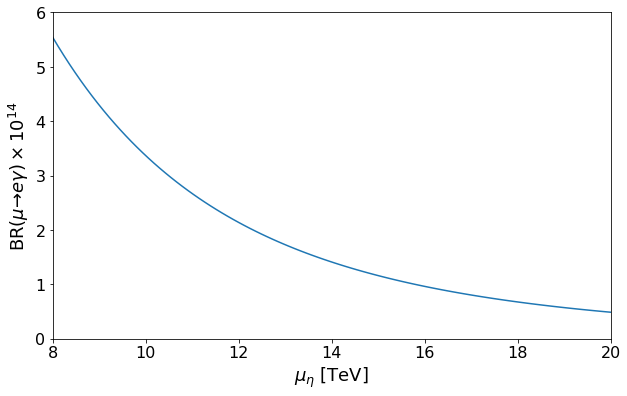

In [27]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(8, 20, 100), np.array(BRemugamma)*1e14, lw=1.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([8,20])
plt.ylim([0,6])
plt.xlabel(r'$\mu_\eta$ [TeV]', fontsize=18)
_ = plt.ylabel(r'$\mathrm{BR}(\mu\to e\gamma) \times 10^{14}$', fontsize=18)